# IBM HR Analytics - Attrition and Performance

### **About this study:**

HR analytics is a growing field in data science and business because of the potential business outcomes it can unlock through an organization's most important asset: its people. By creating a work environment that fosters inclusion and creativity, organizations can reap the productivity and innovation required to advance their business. 

IBM's data scientists have produced a fictional dataset to help analysts understand the relationship between attrition and performance at an organization. In this dataset, there are 1470 employees represented from research and development, sales and HR. There are 35 fields associated for each employee on variables ranging from education, satisfaction, salary and performance ratings.

This dataset was acquired from Kaggle and can be accessed at the following link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.

### **Outline:**
In the following study, we will explore the following questions:
* 1
* 2

In [1]:
# Import Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# Gather IBM dataset from Kaggle.
df = pd.read_csv('attrition.csv')

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
# Organize columns to include only the fields needed.
df = df[['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [4]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,Sales,1,2,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,Research & Development,8,1,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,4,Yes,37,Travel_Rarely,Research & Development,2,2,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,5,No,33,Travel_Frequently,Research & Development,3,4,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,7,No,27,Travel_Rarely,Research & Development,2,1,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [5]:
df.describe()

,EmployeeNumber,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

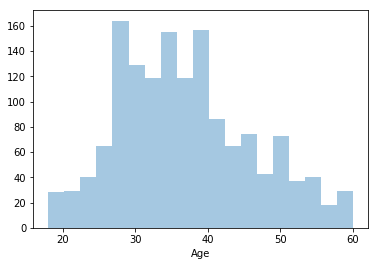

In [13]:
sns.distplot(df["Age"], kde=False);

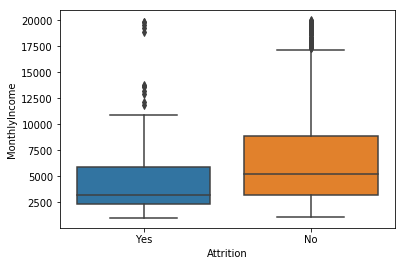

In [15]:
sns.boxplot(y=df['MonthlyIncome'], x=df['Attrition']);

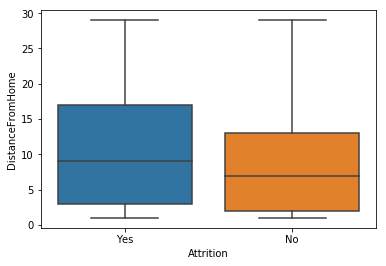

In [17]:
sns.boxplot(y=df['DistanceFromHome'], x=df['Attrition']);

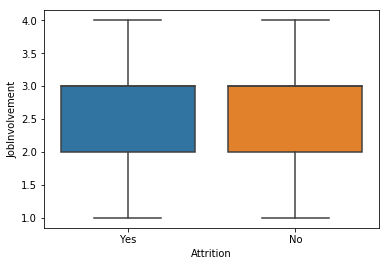

In [18]:
sns.boxplot(y=df['JobInvolvement'], x=df['Attrition']);

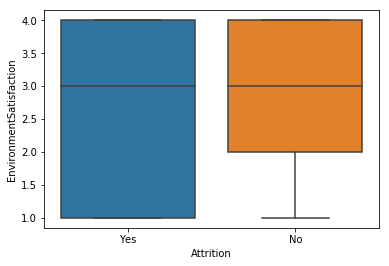

In [19]:
sns.boxplot(y=df['EnvironmentSatisfaction'], x=df['Attrition']);

In [20]:
df['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

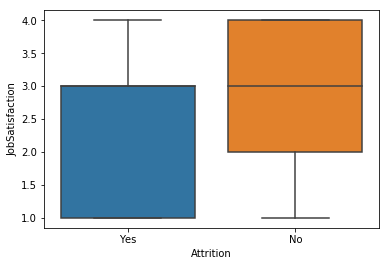

In [21]:
sns.boxplot(y=df['JobSatisfaction'], x=df['Attrition']);

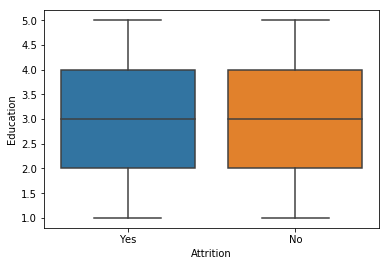

In [22]:
sns.boxplot(y=df['Education'], x=df['Attrition']);

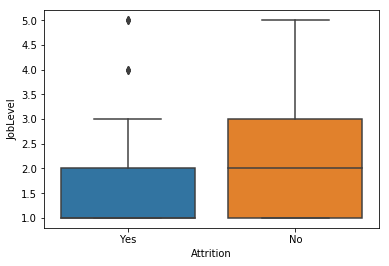

In [23]:
sns.boxplot(y=df['JobLevel'], x=df['Attrition']);

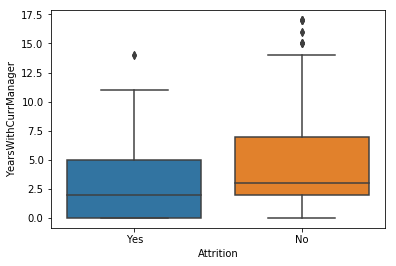

In [25]:
sns.boxplot(y=df['YearsWithCurrManager'], x=df['Attrition']);

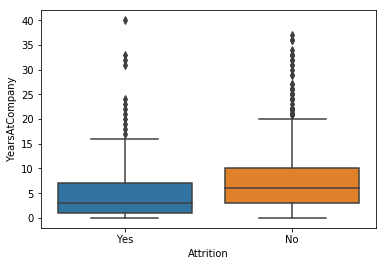

In [26]:
sns.boxplot(y=df['YearsAtCompany'], x=df['Attrition']);

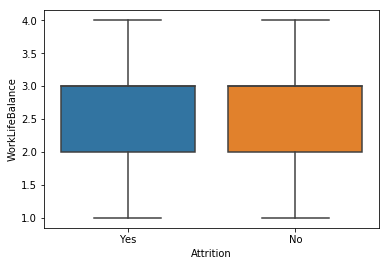

In [27]:
sns.boxplot(y=df['WorkLifeBalance'], x=df['Attrition']);

In [29]:
sns.boxplot(y=df['YearsSinceLastPromotion'], x=df['Attrition'], hue='Department');

ValueError: Could not interpret input 'Department'